In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Загружаем данные
df_vk = pd.read_excel(r"\\megafon.ru\fr\MF\CNT\VOL03\dmitry.Kalinin\Desktop\Данные по туториалу для Тестового задания для аналитика.xlsx", sheet_name=1)
df_ok = pd.read_excel(r"\\megafon.ru\fr\MF\CNT\VOL03\dmitry.Kalinin\Desktop\Данные по туториалу для Тестового задания для аналитика.xlsx", sheet_name=2)

In [ ]:
# укорачиваем названия столбцов
word_to_remove = "Туториал: "

df_vk.columns = df_vk.columns.str.replace(word_to_remove, '', regex=False) 
df_ok.columns = df_ok.columns.str.replace(word_to_remove, '', regex=False) 

In [49]:
# Суммируем непустые строки, чтобы посмотреть сколько игроков было на каждом шаге
grouped_vk = df_vk.groupby('Платформа').agg(lambda x: x.notna().sum())
grouped_ok = df_ok.groupby('Платформа').agg(lambda x: x.notna().sum())

In [54]:
grouped_vk

,Платформа,ID игрока,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,Шаг 5,К.Шаг 0,К.Шаг 1,К.Шаг 2,К.Шаг 3,К.Шаг 4,К.Шаг 5
0,Android ВК,998,995,968,957,955,939,928,0.996994,0.972864,0.988636,0.99791,0.983246,0.988285


In [55]:
grouped_ok

,Платформа,ID игрока,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,Шаг 5,К.Шаг 0,К.Шаг 1,К.Шаг 2,К.Шаг 3,К.Шаг 4,К.Шаг 5
0,Direct OK,1992,1873,1329,1199,1179,1083,989,0.940261,0.709557,0.902182,0.983319,0.918575,0.913204


In [50]:
# Рассчитываем конверсию для каждого шага
for i in range(0, 6): # Цикл по шагам туториала
    step_col = f'Шаг {i}'
    prev_step_col = 'ID игрока' if i == 0 else f'Шаг {i-1}' # Определяем предыдущий шаг

    # Рассчитываем конверсию, группируя по платформе
    grouped_vk[f'К.Шаг {i}'] = (grouped_vk[step_col] / grouped_vk[prev_step_col]).fillna(0) # учитываем деление на 0


# Рассчитываем конверсию для каждого шага
for i in range(0, 6): # Цикл по шагам туториала
    step_col = f'Шаг {i}'
    prev_step_col = 'ID игрока' if i == 0 else f'Шаг {i-1}' # Определяем предыдущий шаг

    # Рассчитываем конверсию, группируя по платформе
    grouped_ok[f'К.Шаг {i}'] = (grouped_ok[step_col] / grouped_ok[prev_step_col]).fillna(0) # учитываем деление на 0

In [51]:
grouped_vk = grouped_vk.reset_index()
grouped_ok = grouped_ok.reset_index()

Построим график абсолютных значений

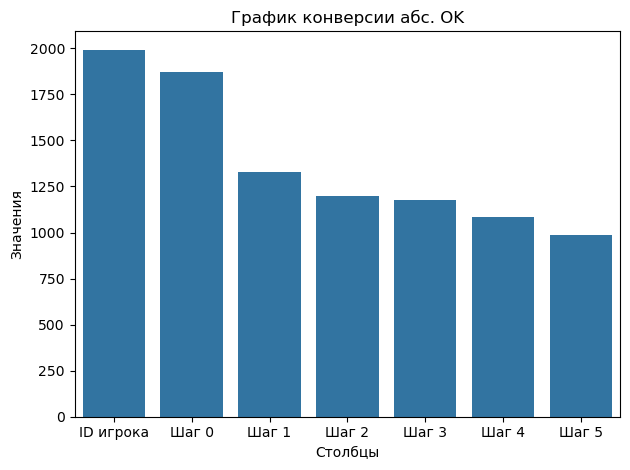

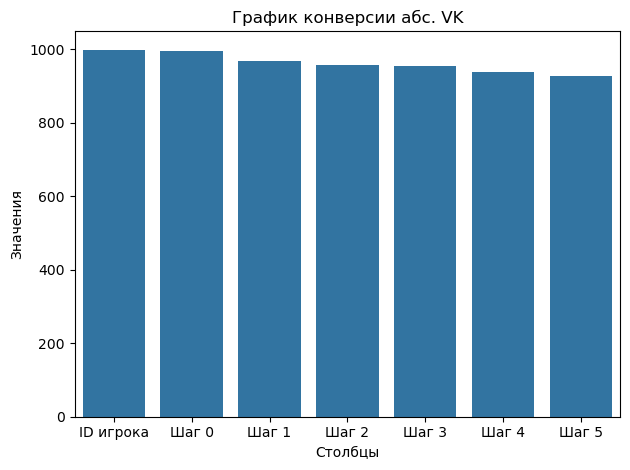

In [52]:
# Преобразуем данные в "длинный" формат
df_melted_ok = grouped_ok.iloc[:, 1:8].melt(var_name='Столбец', value_name='Значение')

# Строим столбчатый график
sns.barplot(x='Столбец', y='Значение', data=df_melted_ok)

# Настраиваем график (опционально)
plt.title('График конверсии абс. OK')
plt.xlabel('Столбцы')
plt.ylabel('Значения')
plt.xticks(rotation=0) # Поворачиваем подписи на оси x
plt.tight_layout()

# Отображаем график
plt.show()

# Преобразуем данные в "длинный" формат
df_melted_vk = grouped_vk.iloc[:, 1:8].melt(var_name='Столбец', value_name='Значение')

# Строим столбчатый график
sns.barplot(x='Столбец', y='Значение', data=df_melted_vk)

# Настраиваем график (опционально)
plt.title('График конверсии абс. VK')
plt.xlabel('Столбцы')
plt.ylabel('Значения')
plt.xticks(rotation=0) # Поворачиваем подписи на оси x
plt.tight_layout()

# Отображаем график
plt.show()

Построим график конверсии кажого шага

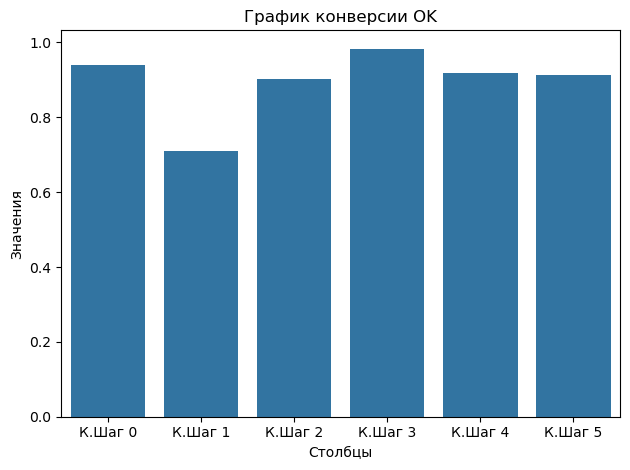

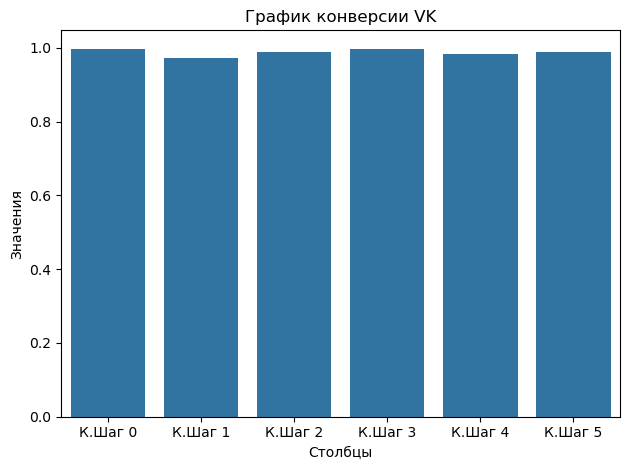

In [53]:
# Преобразуем данные в "длинный" формат
df_melted_ok = grouped_ok.iloc[:, 8:14].melt(var_name='Столбец', value_name='Значение')

# Строим столбчатый график
sns.barplot(x='Столбец', y='Значение', data=df_melted_ok)

# Настраиваем график (опционально)
plt.title('График конверсии OK')
plt.xlabel('Столбцы')
plt.ylabel('Значения')
plt.xticks(rotation=0) # Поворачиваем подписи на оси x
plt.tight_layout()

# Отображаем график
plt.show()

# Преобразуем данные в "длинный" формат
df_melted_vk = grouped_vk.iloc[:, 8:14].melt(var_name='Столбец', value_name='Значение')

# Строим столбчатый график
sns.barplot(x='Столбец', y='Значение', data=df_melted_vk)

# Настраиваем график (опционально)
plt.title('График конверсии VK')
plt.xlabel('Столбцы')
plt.ylabel('Значения')
plt.xticks(rotation=0) # Поворачиваем подписи на оси x
plt.tight_layout()

# Отображаем график
plt.show()

1. Введение:

Цель данного анализа - сравнить конверсию туториала в двух каналах: Приложение Direct OK и Приложение Android VK, и определить возможности для оптимизации. Мы проанализировали данные, протестировали ссылки и сам туториал в обоих приложениях, чтобы выявить ключевые различия и предложить пути улучшения.

2. Описание данных:

Данные о прохождении туториала представлены в таблицах для каждого канала. В таблицах указано количество пользователей, прошедших каждый шаг туториала. Мы суммировали количество пользователей, выполнивших каждый шаг, чтобы получить абсолютные значения конверсии. Относительная конверсия (отношение числа пользователей, прошедших шаг, к предыдущему шагу) была рассчитана для каждого шага.  Количество уникальных пользователей в таблицах различается, что вызывает вопрос о временных рамках сбора данных. 

3. Анализ конверсии:

По таблицам видно, что конверсия в туториале приложения Direct OK неравномерная с заметными спадами, особенно на первом шаге. В приложении Android VK конверсия равномерно высокая. Общее количество пользователей, начавших туториал, значительно выше в Direct OK (1992), чем в Android VK (998). Однако, количество пользователей, прошедших весь туториал, приблизительно одинаково (989 и 928 соответственно).

4. Интерпретация результатов:

Ключевое различие между каналами — способ доступа к игре. Android VK требует скачивания приложения, что предполагает более высокую мотивацию пользователей. Direct OK открывается сразу в браузере, что удобнее, но привлекает меньше целевых пользователей, готовых проходить туториал. Высокая конверсия в туториале Android VK объясняется тем, что пользователи осознанно скачивают игру и настроены на более глубокое взаимодействие. Неравномерная конверсия в Direct OK связана с большим количеством случайных пользователей, которые не заинтересованы в прохождении туториала. Резкий спад конверсии на первом шаге Direct OK можно объяснить "естественным отсевом" менее заинтересованных пользователей, аналогичным отсеву на этапе скачивания приложения в Android VK.

5. Рекомендации:

* Android VK: Фокус на увеличение входного трафика через оптимизацию таргетинга. Учитывая высокую конверсию в туториале, увеличение входного трафика приведет к росту числа пользователей, прошедших туториал.

* Direct OK: Оптимизация таргетинга для привлечения более заинтересованных пользователей. A/B тестирование различных вариантов первого шага туториала, например, с добавлением информации о конкретных наградах за прохождение (например, бонусы, внутриигровая валюта, эксклюзивные предметы). Это может повысить мотивацию пользователей продолжать туториал. Также необходимо исследовать причины спадов конверсии на других шагах и разработать соответствующие улучшения.

6. Ограничения анализа и дальнейшие исследования:

В данном анализе не учитывались данные по условиям таргетинга в обоих каналах, что ограничивает возможности анализа входного трафика.  Для получения более полной картины рекомендуется провести дополнительные исследования, включающие анализ данных по таргетингу и A/B тестирование различных вариантов туториала.